#Develop, test clustering
Apply Sun position mask

In [1]:
%matplotlib inline
import pyfits, glob, pickle
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly/month01'))
from uw.like2.pub import healpix_map; reload(healpix_map)
from uw.like2.analyze import hptables; reload(hptables)
from uw.like2.pipeline import check_ts; reload(check_ts)

<module 'uw.like2.pipeline.check_ts' from '/afs/slac/g/glast/groups/catalog/pointlike/python/uw/like2/pipeline/check_ts.pyc'>

In [3]:
self=hptables.HPtables()

Found table ts in file hptables_ts_kde_512.fits
loaded file hptables_ts_kde_512.fits 
reconstructing seeds: hptables_ts_kde_512.fits --> seeds_ts.txt:  Too many pixels, 38135>30000, to cluster
0 seeds


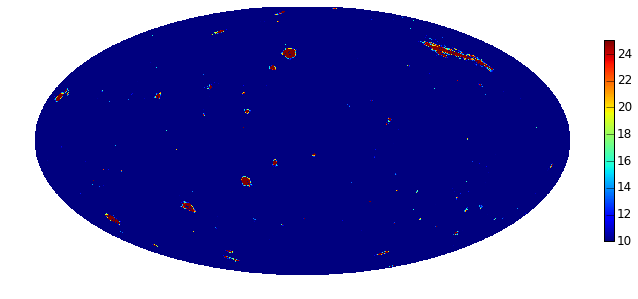

In [4]:
self.ts_map();

In [5]:
hpts = healpix_map.HParray(self.tsname, self.tables[self.tsname])

In [6]:
ecliptic_info= pickle.load(open(os.path.expandvars('$FERMI/misc/ecliptic_512.pickle')))
monthly_info = pd.read_csv(os.path.expandvars('$FERMI/skymodels/P301_monthly/month_info.csv'), index_col=0)                         

In [7]:
monthly_info.ix[1]

filename    ltcube_001_zmax100.fits
tstart                 2.395574e+08
tstop                    2.4196e+08
sun_ra                     134.9682
sun_dec                    17.05195
sun_elon                   132.5044
Name: 1, dtype: object

In [8]:
elat_mask = np.abs(ecliptic_info[:,1])<5; sum(elat_mask)

274214

In [ ]:
def ecliptic_mask( elon_min, elon_max, elat_max=5):
    ecliptic_info= pickle.load(open(os.path.expandvars('$FERMI/misc/ecliptic_512.pickle')))
    elon_vec = ecliptic_info[:,0]
    elat_mask = np.abs(ecliptic_info[:,1])<5
    elon_mask = (elon_vec>132.5) & (elon_vec<(132.5+30));
    return elat_mask & elon_mask
e_mask=ecliptic_mask(102.5, 162.5)
    

masked pixels: 22846


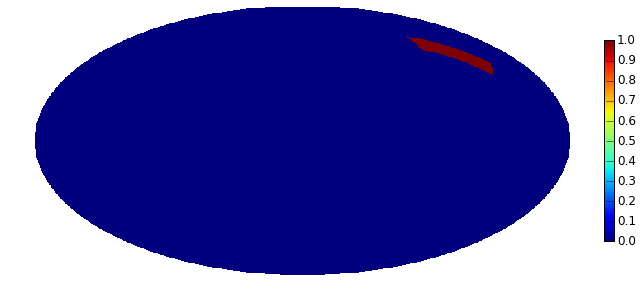

In [9]:
elon_vec = ecliptic_info[:,0]
elon_mask = (elon_vec>132.5) & (elon_vec<(132.5+30));
ecliptic_mask = elat_mask & elon_mask; sum(ecliptic_mask)
print 'masked pixels:', sum(ecliptic_mask)
mask_check = healpix_map.HParray('mask_check', ecliptic_mask)
mask_check.plot()

In [10]:
pixels=tsdata.indices(ts_min=10,mask=~ecliptic_mask); len(pixels), pixels

(26985, array([   6210,    6211,    6212, ..., 3129522, 3129879, 3129880]))

In [12]:
seedfile='seeds_ts.txt'
rec = open(seedfile, 'w')
nseeds = check_ts.make_seeds(tsdata, 'test',  rec=rec, seedroot='M01', mask=~ecliptic_mask)

Clustering 26985 pixels...
Found 784 clusters
Found 784 clusters
Added split clusters, now 813 total
